# Project 6

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
df = pd.read_csv('dataset/RRCA_baseflow.csv')
display(df.head())
display(df.shape)
df['Date'] = df['Date'] - 693963# subtract to get date correct.
df['Readable_Date'] = pd.to_datetime(df.Date.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
df['year'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).day)
max_date = df['Date'].max()
print(max_date)

# display(df)
# display(f'Unique dates sampled: {len(df.Date.unique()), df.Date.unique().tolist()}')
# display(f'Unique segments sampled: {len(df.Segment_id.unique()), df.Date.unique().tolist()}')
bySegment = df.groupby('Segment_id').count()
# display(bySegment)
# display(bySegment.std().Date)
# display(bySegment.mean().Date)
# TODO: Drop segments with very few (or very many?) samples
# df = df.groupby('Segment_id').filter(lambda x: len(x) >= 75)#gets rid of the segments with less than 75 samples
segmentDateMinMax = df.groupby('Segment_id')['Date'].agg(['min', 'max']).reset_index()
# display(segmentDateMinMax.sort_values(['min', 'max']))
# display(segmentDateMinMax.sort_values(['max', 'min']))

# display(segmentDateMinMax.sort_values('min')['min'].unique())
# display(segmentDateMinMax.sort_values('max')['max'].unique())

segmentObservedMinMax = df.groupby('Segment_id')['Observed'].agg(['min', 'max', 'mean']).reset_index()
display(segmentObservedMinMax.sort_values('max'))
display(segmentObservedMinMax.sort_values('mean'))
outlierSegments = segmentObservedMinMax.sort_values('mean', ascending=False).head(2).Segment_id.tolist()
for outlier in outlierSegments:
    df = df[df.Segment_id != outlier]
df.Segment_id.unique()

#Your task is to experiment with linear regression on this dataset. This is a difficult dataset to interpret, and most of your time will be looking at scatterplots, 
#looking at the data over time, looking at positional data, looking at individual segments, and doing background research. Just running regression and looking at the p values 
#for different attributes is most definitely not enough.


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


(15591, 8)

36766


,Segment_id,min,max,mean
14,118,0.068852,0.712258,0.401170
1,51,0.000000,2.373559,0.120455
13,98,0.090000,2.470000,0.804866
3,55,0.070508,4.538689,1.449889
8,63,3.317049,4.931613,4.432331
9,64,0.911639,7.681864,5.507342
4,56,0.000000,8.810492,3.372105
17,135,1.509679,9.469333,5.445460
25,149,0.271967,9.790678,6.092887
10,65,0.120492,11.596102,6.034295


,Segment_id,min,max,mean
1,51,0.000000,2.373559,0.120455
14,118,0.068852,0.712258,0.401170
13,98,0.090000,2.470000,0.804866
21,145,0.000000,13.900000,1.224663
3,55,0.070508,4.538689,1.449889
22,146,0.000000,12.098305,2.212100
36,189,0.000000,23.317167,2.696089
4,56,0.000000,8.810492,3.372105
26,152,0.000000,27.975806,4.035541
8,63,3.317049,4.931613,4.432331


array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 205,  59, 148, 138,
        62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146, 189,  56,
        98])

<AxesSubplot: xlabel='year', ylabel='Observed'>

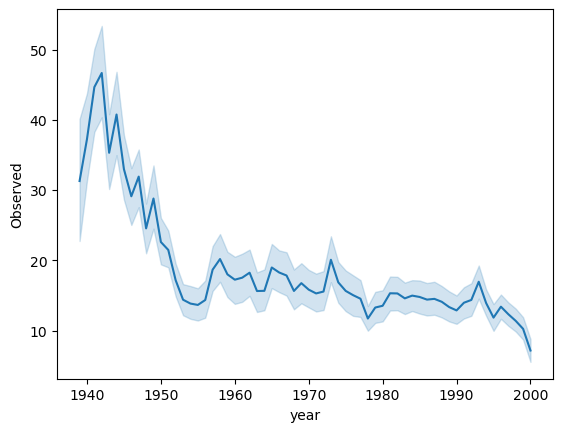

In [7]:
sns.lineplot(data=df, x='year', y='Observed')

<AxesSubplot: xlabel='year', ylabel='Observed'>

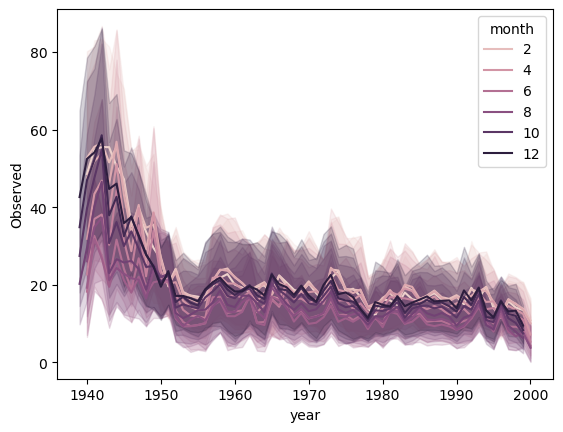

In [8]:
sns.lineplot(data=df, x='year', y='Observed', hue="month")

<AxesSubplot: xlabel='month', ylabel='Observed'>

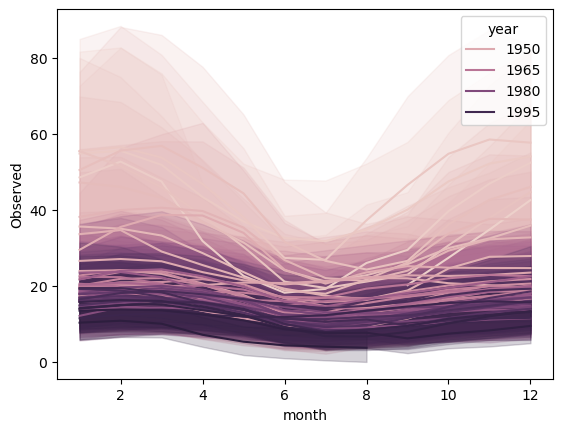

In [9]:
sns.lineplot(data=df, x='month', y='Observed', hue="year")

,year,Observed
0,1939,31.293530
1,1940,37.250385
2,1941,44.673837
3,1942,46.683285
4,1943,35.319446
...,...,...
57,1996,13.397455
58,1997,12.324935
59,1998,11.377356
60,1999,10.239338


<AxesSubplot: xlabel='year', ylabel='Observed'>

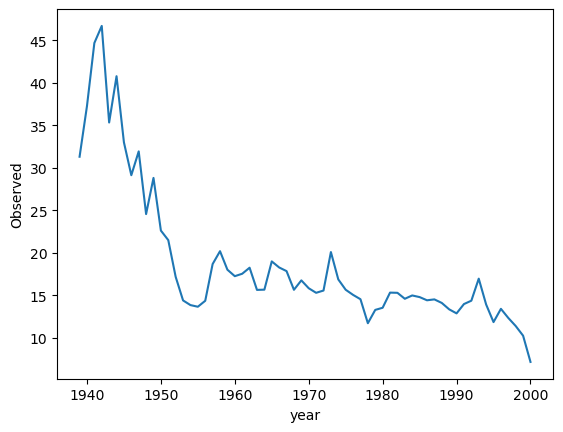

In [10]:
avgObservedPerYear = df.groupby('year')['Observed'].mean().reset_index()
display(avgObservedPerYear)

sns.lineplot(data=avgObservedPerYear, x='year', y='Observed')

,month,Observed
0,1,21.641172
1,2,22.439417
2,3,21.942202
3,4,20.083303
4,5,17.670620
5,6,14.247967
6,7,13.205696
7,8,14.347583
8,9,16.029639
9,10,18.351812


<AxesSubplot: xlabel='month', ylabel='Observed'>

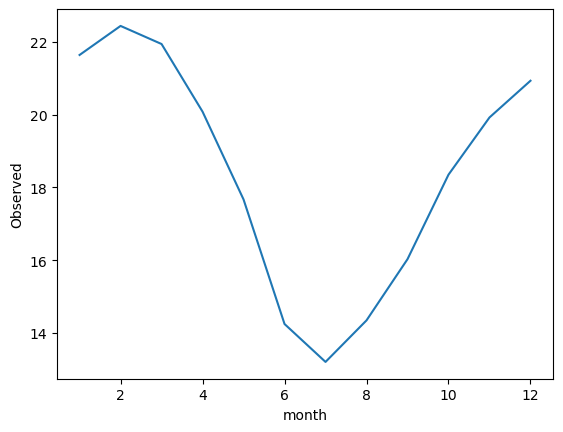

In [11]:
avgObservedPerMonth = df.groupby('month')['Observed'].mean().reset_index()
display(avgObservedPerMonth)

sns.lineplot(data=avgObservedPerMonth, x='month', y='Observed')

,year,month,Observed
0,1939,9,20.256087
1,1939,10,27.445252
2,1939,11,34.853246
3,1939,12,42.619536
4,1940,1,48.580475
...,...,...,...
727,2000,4,7.175279
728,2000,5,5.352061
729,2000,6,4.399778
730,2000,7,4.042711


<AxesSubplot: xlabel='month', ylabel='Observed'>

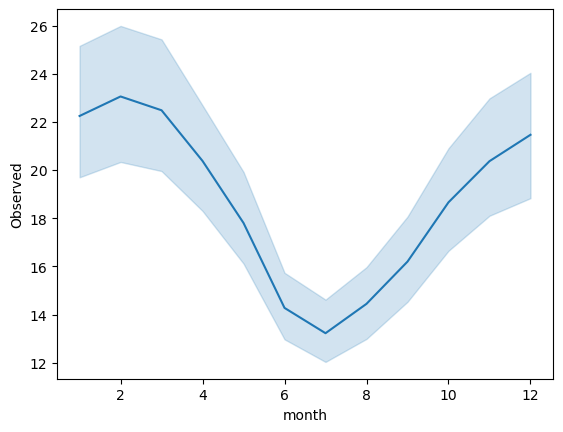

In [12]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month', y='Observed')

,year,month,Observed
0,1939,9,20.256087
1,1939,10,27.445252
2,1939,11,34.853246
3,1939,12,42.619536
4,1940,1,48.580475
...,...,...,...
727,2000,4,7.175279
728,2000,5,5.352061
729,2000,6,4.399778
730,2000,7,4.042711


<AxesSubplot: xlabel='month', ylabel='Observed'>

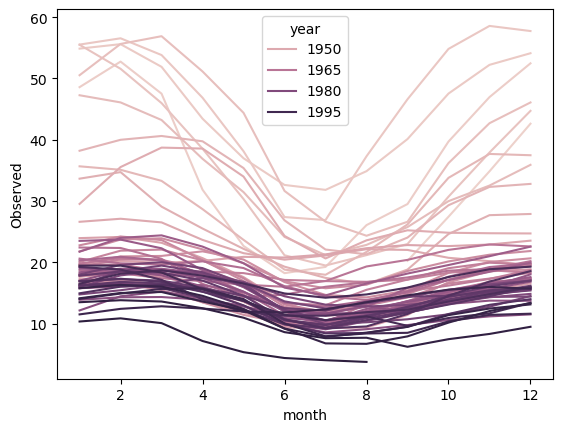

In [13]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month', y='Observed', hue='year')

,year,month,Observed
0,1939,9,20.256087
1,1939,10,27.445252
2,1939,11,34.853246
3,1939,12,42.619536
4,1940,1,48.580475
...,...,...,...
727,2000,4,7.175279
728,2000,5,5.352061
729,2000,6,4.399778
730,2000,7,4.042711


<AxesSubplot: xlabel='year', ylabel='Observed'>

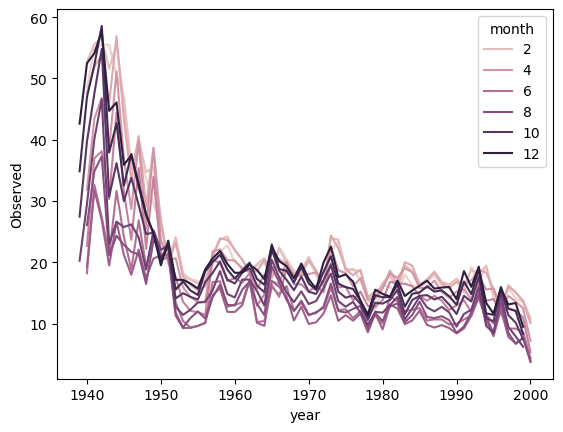

In [14]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='year', y='Observed', hue='month')

,year,month,Observed,month_year
0,1939,9,20.256087,477
1,1939,10,27.445252,478
2,1939,11,34.853246,479
3,1939,12,42.619536,480
4,1940,1,48.580475,481
...,...,...,...,...
727,2000,4,7.175279,1204
728,2000,5,5.352061,1205
729,2000,6,4.399778,1206
730,2000,7,4.042711,1207


Text(0.5, 0, 'Months since 1900')

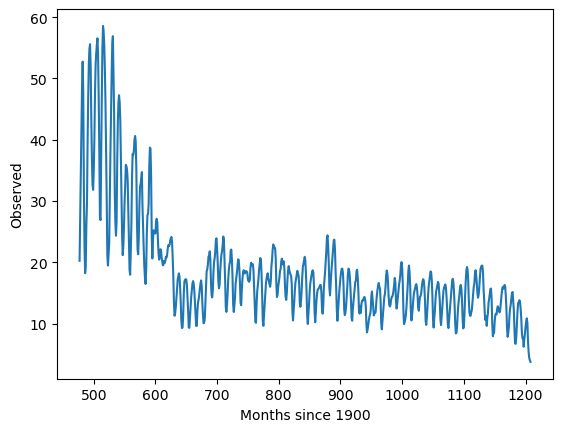

In [15]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
avgObservedByMonth['month_year'] = avgObservedByMonth['month'] + avgObservedByMonth['year'] * 12 - 22800
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month_year', y='Observed')
plt.xlabel('Months since 1900')

In [16]:
avgObservedByMonth[avgObservedByMonth.year < 1950].sort_values(by="Observed")

,year,month,Observed,month_year
107,1948,8,16.480546,584
106,1948,7,17.467889,583
82,1946,7,17.976549,559
9,1940,6,18.239776,486
81,1946,6,18.818967,558
...,...,...,...,...
53,1944,2,55.629701,530
29,1942,2,56.549796,506
54,1944,3,56.892885,531
39,1942,12,57.734091,516


### Looking at scatterplots data over time, positional data, individual segments, and doing background research.

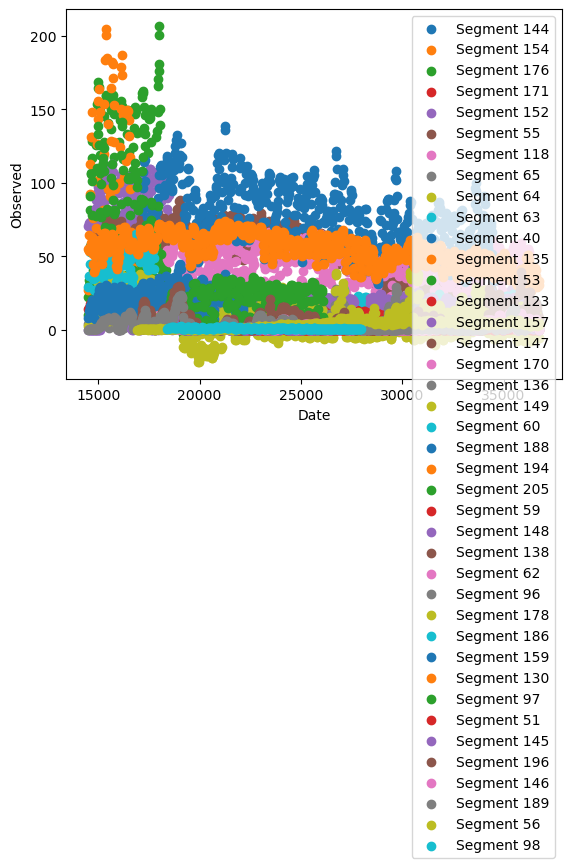

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Readable_Date,year,month,day
Segment_id,,,,,,,,,,,
96,732,732,732,732,732,732,732,732,732,732,732
130,732,732,732,732,732,732,732,732,732,732,732


In [17]:
#First lets do some scatterplots
for segment_id in df['Segment_id'].unique():
  segment_data = df[df['Segment_id'] == segment_id]
  plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')
  
plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()
# First let's do some scatterplots
top_two_segments = bySegment.nlargest(2, 'Date')
display(top_two_segments)

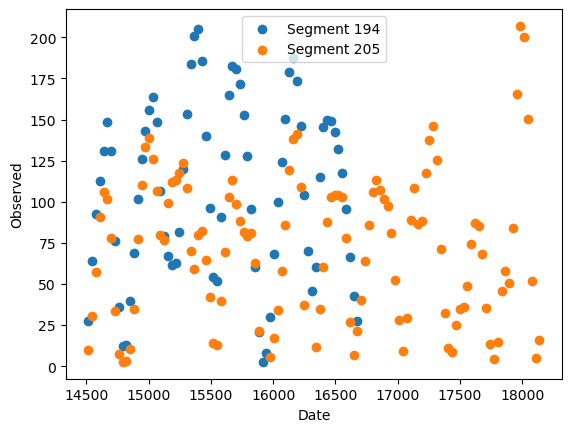

In [18]:
for segment_id in df['Segment_id'].unique():
    segment_data = df[df['Segment_id'] == segment_id]
    if segment_data['Observed'].max() > 200:
        plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')

plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()

In [19]:
# here we see the top three best observed output, its intereting as they only go until 18000 while all the data goes to 35000

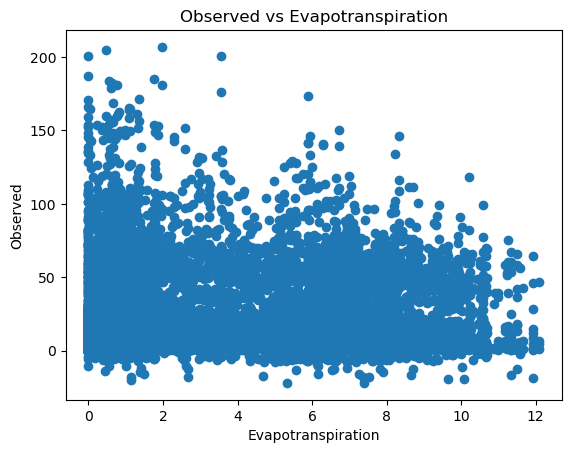

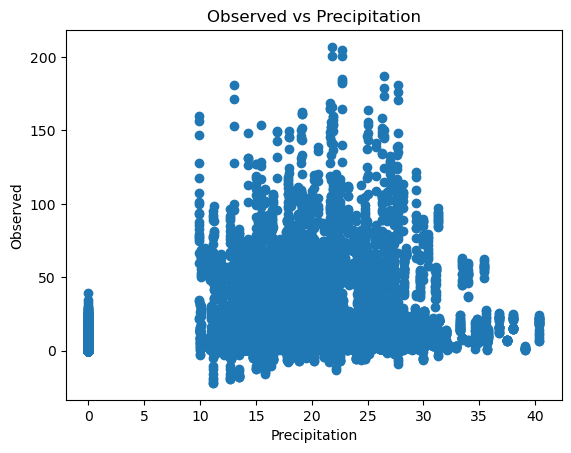

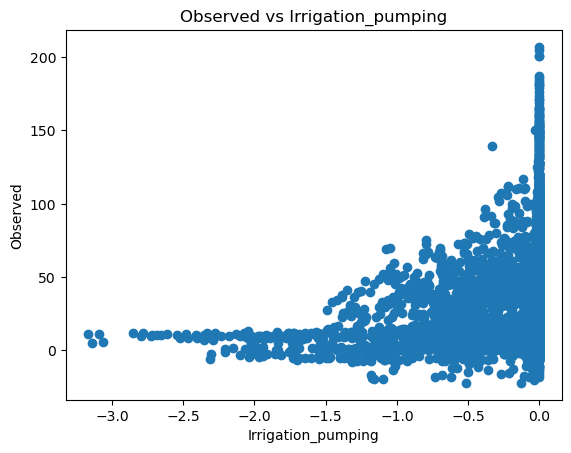

In [20]:
plt.scatter(df['Evapotranspiration'], df['Observed'])
plt.xlabel('Evapotranspiration')
plt.ylabel('Observed')
plt.title('Observed vs Evapotranspiration')
plt.show()

plt.scatter(df['Precipitation'], df['Observed'])
plt.xlabel('Precipitation')
plt.ylabel('Observed')
plt.title('Observed vs Precipitation')
plt.show()

plt.scatter(df['Irrigation_pumping'], df['Observed'])
plt.xlabel('Irrigation_pumping')
plt.ylabel('Observed')
plt.title('Observed vs Irrigation_pumping')
plt.show()




[26.06059083 11.38257487 19.53824284 ... 31.52550558 -8.87311637
  4.7628862 ]
0.3346869875221342


,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping
9045,96,806350,14550720,5.66,20.07,-0.15031
1889,65,838030,14556000,7.97,13.53,-0.48067
7263,59,874990,14556000,0.00,16.77,0.00000
15541,98,721870,14387040,0.00,0.00,0.00000
3996,147,906670,14693280,0.85,21.67,0.00000
...,...,...,...,...,...,...
13371,171,1381870,14460960,0.00,0.00,0.00000
14734,56,1170670,14582400,0.00,0.00,0.00000
8606,96,806350,14550720,1.11,23.00,0.00000
2596,40,1798990,14561280,4.99,26.20,-0.00871


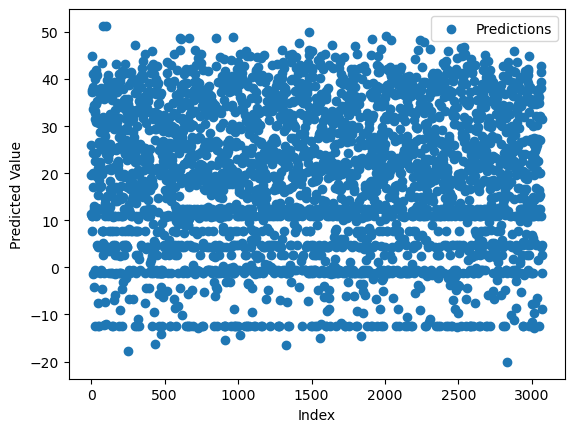

In [48]:
feature_cols = ['Segment_id',	'x',	'y',	'Evapotranspiration',	'Precipitation',	'Irrigation_pumping']
X = df[feature_cols]
y = df["Observed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Segment_id	x	y	Evapotranspiration	Precipitation	Irrigation_pumping	Observed
lm = LinearRegression()
lm.fit(X_train, y_train)


predictions = lm.predict(X_test)
print(predictions)
r_squared = r2_score(y_test, predictions)
print(r_squared)
display(X_test)

plt.scatter(range(len(predictions)), predictions, label='Predictions')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()


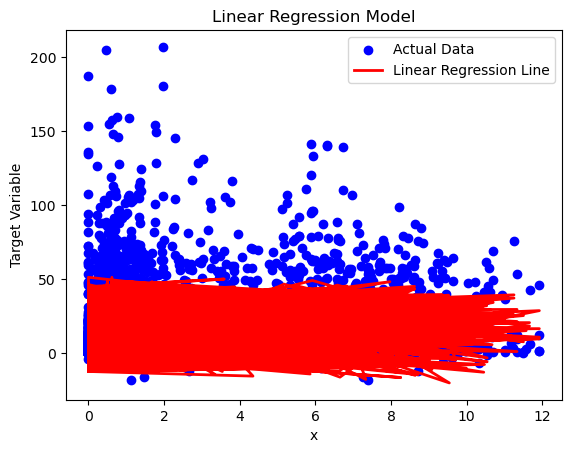

In [45]:
import matplotlib.pyplot as plt

# Plot the actual data points
plt.scatter(X_test["Evapotranspiration"], y_test, color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(X_test["Evapotranspiration"], predictions, color='red', linewidth=2, label='Linear Regression Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Target Variable')
plt.title('Linear Regression Model')

# Add legend
plt.legend()

# Show plot
plt.show()
